In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Завантаження даних
df_2d = pd.read_csv('e:\goit\hw6\data\data_2d.csv')
df_mnist = pd.read_csv("e:\goit\hw6\data\mnist.csv")

# Перейменування стовпців
df_2d.columns = ['X1', 'X2', 'X3']

print(df_2d.head())

# Виключення першого стовпця, який визначає класи
data_for_clustering = df_2d.iloc[:, 1:]

    X1        X2        X3
0  0.0  2.687848  2.366961
1  0.0 -0.201379  0.470430
2  0.0  0.608496  1.225400
3  0.0 -0.082282  1.137218
4  0.0  2.083069  2.694482


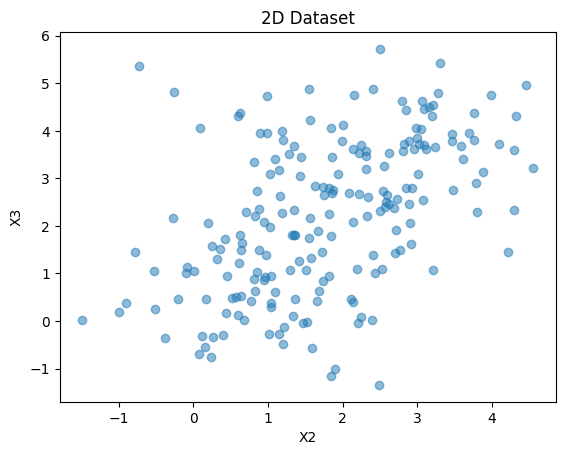

In [3]:
# Візуалізація даних
plt.scatter(data_for_clustering['X2'], data_for_clustering['X3'], alpha=0.5)
plt.title('2D Dataset')
plt.xlabel('X2')
plt.ylabel('X3')
plt.show()

In [4]:
# Використання ліктевого методу для визначення оптимальної кількості кластерів
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)


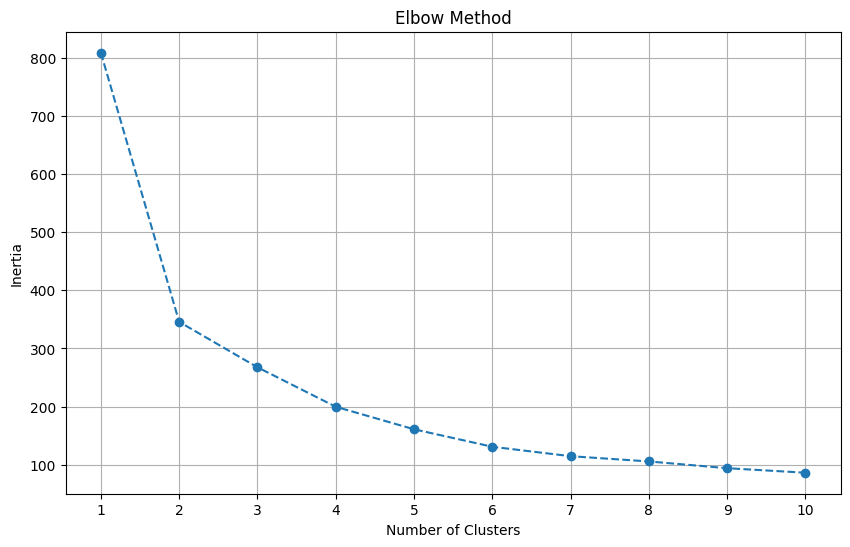

In [5]:

# Візуалізація ліктя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [6]:
# Застосування алгоритму K-means з кластерами
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_2d)

KMeans(n_clusters=2, random_state=42)

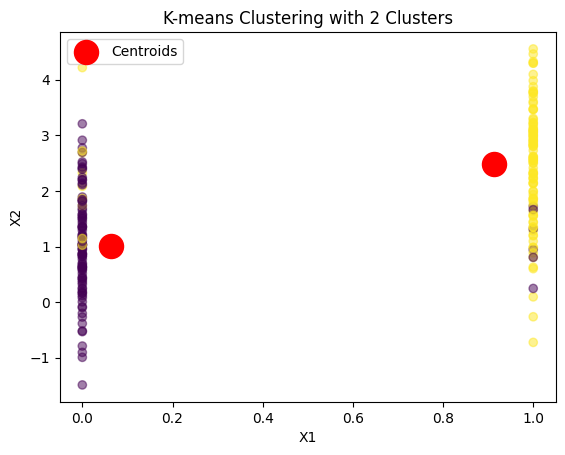

In [7]:
# Візуалізація результатів кластеризації
plt.scatter(df_2d['X1'], df_2d['X2'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=300, c='red', label='Centroids')
plt.title('K-means Clustering with 2 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [8]:
# Зменшення розмірності MNIST даних до 2D за допомогою PCA
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(df_mnist)

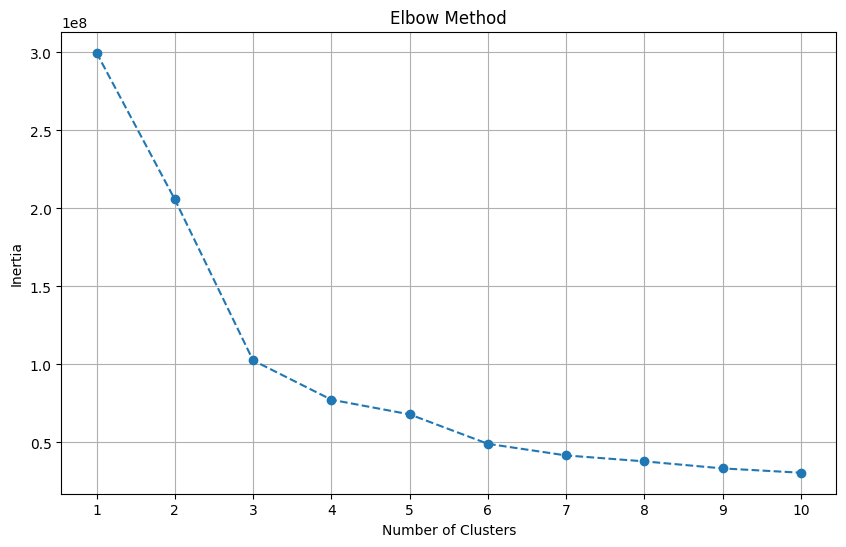

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mnist_2d)
    inertia.append(kmeans.inertia_)

# Візуалізація ліктя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

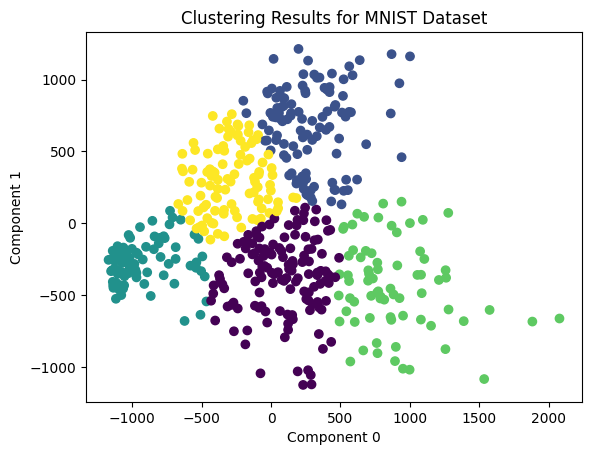

In [10]:
# Візуалізація результатів кластеризації для MNIST даних
kmeans_mnist = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_mnist = kmeans_mnist.fit_predict(mnist_2d)
plt.scatter(mnist_2d[:, 0], mnist_2d[:, 1], c=clusters_mnist, cmap='viridis')
plt.title('Clustering Results for MNIST Dataset')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.show()